### K-Nearest Neighbor
- Uses k value to check for k neighbors to decide what class the data fits in.
- Distance can be calculated using 2 methods:
- 1) Manhattan Distance
  2) Euclidean Distance (Pythagorus Distance)

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [82]:
dataset = pd.read_csv("/Users/rachanapandey/Desktop/study_materials/Data Science/Dataset/Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [83]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [84]:
# integer based indexing method
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

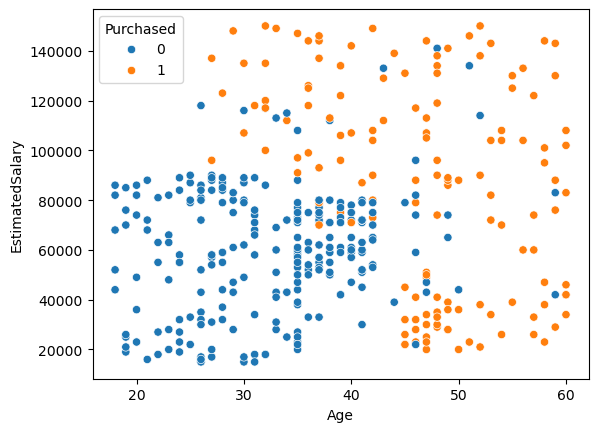

In [85]:
sns.scatterplot(data=dataset, x="Age", y="EstimatedSalary", hue="Purchased")
plt.show()

In [86]:
ss = StandardScaler()
ss.fit(x)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [87]:
x = pd.DataFrame(ss.transform(x), columns= x.columns)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=3, p=1)
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [91]:
knn.score(x_test, y_test)*100

92.5

In [92]:
knn.score(x_train, y_train)*100

91.875

In [93]:
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i, knn1.score(x_train,y_train)*100, knn1.score(x_test, y_test)*100, 'diff:',knn1.score(x_train,y_train)*100-knn1.score(x_test, y_test)*100 )

1 99.6875 85.0 diff: 14.6875
2 91.5625 86.25 diff: 5.3125
3 92.5 92.5 diff: 0.0
4 91.5625 92.5 diff: -0.9375
5 90.9375 92.5 diff: -1.5625
6 90.9375 90.0 diff: 0.9375
7 91.875 93.75 diff: -1.875
8 90.625 92.5 diff: -1.875
9 91.25 93.75 diff: -2.5
10 90.625 92.5 diff: -1.875
11 90.9375 92.5 diff: -1.5625
12 91.25 92.5 diff: -1.25
13 91.5625 92.5 diff: -0.9375
14 90.625 92.5 diff: -1.875
15 90.625 92.5 diff: -1.875
16 90.0 92.5 diff: -2.5
17 90.3125 92.5 diff: -2.1875
18 90.0 92.5 diff: -2.5
19 90.9375 92.5 diff: -1.5625
20 90.0 93.75 diff: -3.75
21 90.3125 92.5 diff: -2.1875
22 90.0 93.75 diff: -3.75
23 90.3125 93.75 diff: -3.4375
24 89.375 93.75 diff: -4.375
25 90.0 93.75 diff: -3.75
26 89.375 93.75 diff: -4.375
27 89.375 92.5 diff: -3.125
28 88.75 93.75 diff: -5.0
29 88.75 93.75 diff: -5.0


In [94]:
from mlxtend.plotting import plot_decision_regions

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

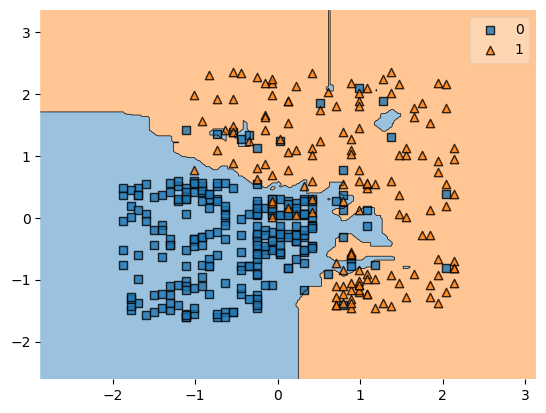

In [95]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = knn)